In [ ]:
import numpy as np # operations on numpy arrays
import pandas as pd # dataframe
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting

In [20]:
# To load the numpy array files for each sample from a destination folder  

import os

features = np.empty([50,256])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
           
        features  = np.append(features,np.load(os.path.join(directory, filename), allow_pickle=True), axis=0) 
        print(os.path.join(directory, filename))
    else:
        continue

features = features[50:,:]
features.shape

C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R1.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R10.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R2.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R3.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R4.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R5.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R6.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R7.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R8.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cerise_R9.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cope_R1.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cope_R10.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy\Cope_R2.npy
C:/Users/nek222/Desktop/PhD U

(5005, 256)

In [21]:
# To load the label CSV file ( target values) for the entire dataset 
from numpy import genfromtxt
labels = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/Npy/Labels.csv', delimiter=',')

In [22]:
# convert numpy array to pandas dataframe 
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,-0.126129,-0.128500,-0.135659,-0.123073,-0.125581,-0.130597,-0.127177,-0.123894,-0.125262,...,-0.133972,-0.132923,-0.123484,-0.134975,-0.128089,-0.129913,-0.127816,-0.131783,-0.131692,-0.065527
1,0.0,-0.121874,-0.127486,-0.129553,-0.123846,-0.125795,-0.127134,-0.126970,-0.121169,-0.122790,...,-0.129975,-0.126923,-0.121451,-0.127345,-0.124950,-0.126641,-0.122884,-0.123917,-0.128519,-0.072678
2,0.0,-0.124348,-0.130818,-0.130702,-0.128154,-0.129379,-0.130074,-0.131778,-0.125027,-0.126318,...,-0.132622,-0.129991,-0.126599,-0.129081,-0.129213,-0.129925,-0.126334,-0.126483,-0.131513,-0.073037
3,0.0,-0.126285,-0.133495,-0.133085,-0.130963,-0.131782,-0.132837,-0.133904,-0.128134,-0.130008,...,-0.135009,-0.132564,-0.130082,-0.131261,-0.131509,-0.132279,-0.128854,-0.129722,-0.133656,-0.066009
4,0.0,-0.126558,-0.133909,-0.133058,-0.131235,-0.131871,-0.133022,-0.134113,-0.128417,-0.130240,...,-0.135288,-0.132698,-0.130419,-0.131439,-0.131859,-0.132698,-0.129196,-0.129940,-0.134005,-0.066427


In [23]:
# load wavelength info. each wavelength respond to 1 band
df_wave = pd.read_csv('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Wavelength_Band_NIR.csv')
df_wave

,880.0436
0,883.3997
1,886.7556
2,890.1113
3,893.4669
4,896.8222
...,...
250,1716.6250
251,1719.9350
252,1723.2450
253,1726.5540


In [ ]:
## add label data to the dataframe and rename each column using the corresponding wavelength
df.columns = df_wave['Wavelength(nm)']
df['Label'] = labels


In [12]:
# dataframe transformation to match the input data format of lineplot function in seaborn 
# details about lineplot https://seaborn.pydata.org/generated/seaborn.lineplot.html
df_melt = df.melt(id_vars='Label', value_name='Reflectance')
df_melt.head()

,Label,Wavelength(nm),Reflectance
0,9.0,880.044,0.0
1,9.0,880.044,0.0
2,9.0,880.044,0.0
3,9.0,880.044,0.0
4,9.0,880.044,0.0


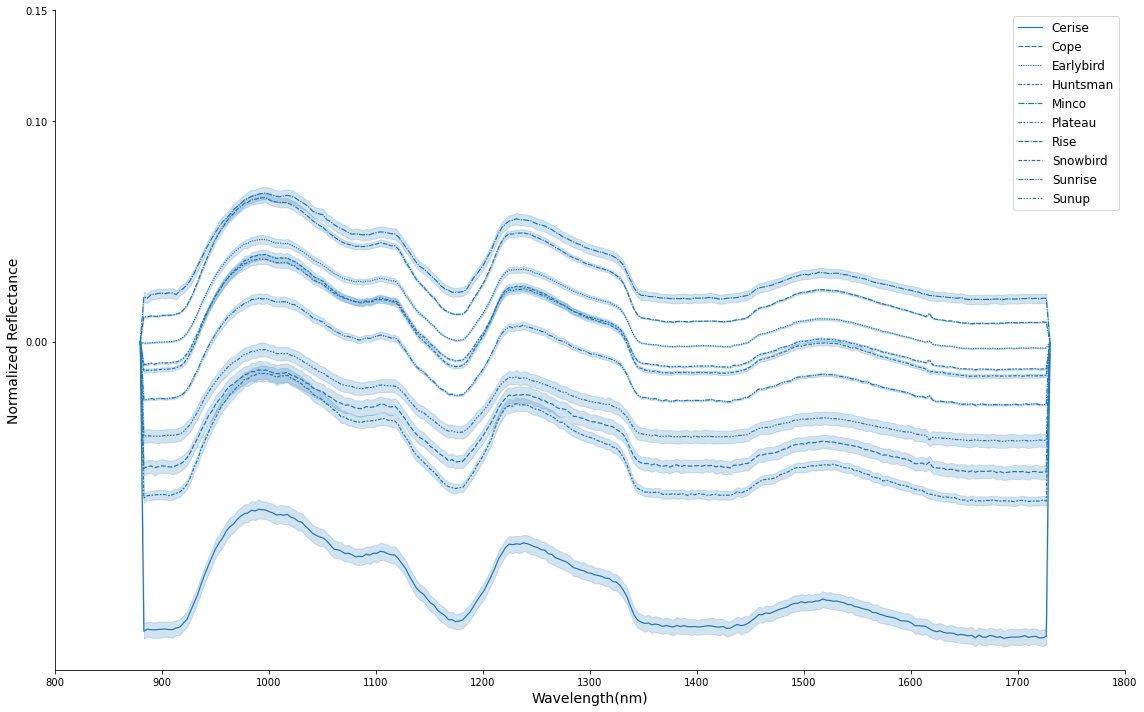

In [13]:
# To plot the spectrum of all the seeds for different cultivars 

fig, ax = plt.subplots(figsize=(16, 10)) # define a figure and a single axes object
ax = sns.lineplot(ax=ax, data=df_melt, x='Wavelength(nm)', y='Reflectance',  
                  style='Label', linewidth=1.2)
ax.set_xticks([800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800])
ax.set_yticks([0.0, 0.1, 0.15])
ax.set_ylabel('Normalized Reflectance', fontsize=14)
ax.set_xlabel('Wavelength(nm)', fontsize=14)
ax.legend(frameon=True, fontsize=12, labels=['Cerise','Cope','Earlybird','Huntsman','Minco','Plateau','Rise','Snowbird','Sunrise','Sunup'])

ax.spines['right'].set_visible(False) # remove right axis
ax.spines['top'].set_visible(False) # remove top axis
plt.tight_layout()
plt.savefig('hyp_signature.png', dpi=300) # save figuer with resolution of 300 dpi
plt.show()

In [15]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn
from sklearn.metrics import classification_report

In [16]:
pca = PCA(n_components=10) # let's consider the first 10 PCs
pca_results = pca.fit_transform(features) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(5005, 10)
variance explained by the first two PCs: 97.91%, 2.06%


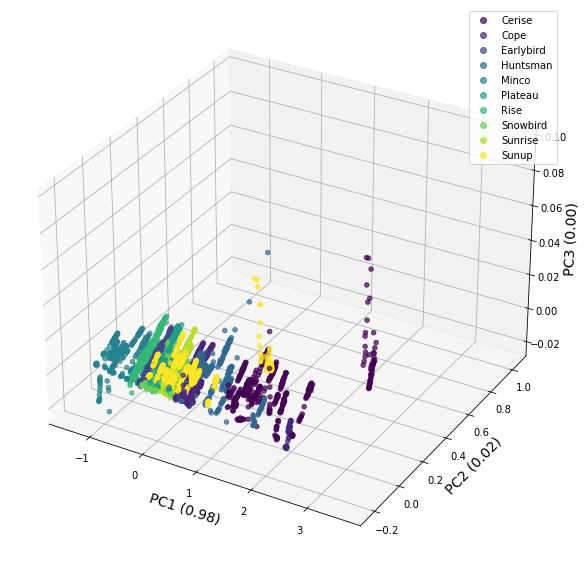

In [19]:
# visualize first 10 components

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (11, 8))
ax = plt.axes(projection ="3d")
s1, s2, s3 = pca_results[:, 0], pca_results[:, 1], pca_results[:, 2] 
scatter = ax.scatter3D(s1, s2, s3, c=labels, s=20, alpha=0.7)

# create the legend
hs, _ = scatter.legend_elements() # handlers of the legend
ls = ['Cerise','Cope','Earlybird','Huntsman','Minco','Plateau','Rise','Snowbird','Sunrise','Sunup'] # labels of the legend
ax.legend(hs, ls)

# add labels
ax.set_xlabel('PC1 (%.2f)'%pca_scores[0],fontsize=14)
ax.set_ylabel('PC2 (%.2f)'%pca_scores[1],fontsize=14)
ax.set_zlabel('PC3 (%.2f)'%pca_scores[2],fontsize=14)
plt.tight_layout()
plt.savefig('pcs_Millet.png', dpi=300)
plt.show()

In [18]:
from sklearn.model_selection import KFold # for five fold cross validation
from sklearn.metrics import confusion_matrix # calcuate confusion matrix
from sklearn.metrics import classification_report

In [19]:
from sklearn import svm

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = svm.SVC(kernel='rbf') # try linear kernel also
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4,5,6,7,8,9])
    print(classification_report(y_test, y_predict, labels=[0,1,2,3,4,5,6,7,8,9]))

overal accuracy: 0.694
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       109
           1       0.62      0.92      0.74        93
           2       0.73      1.00      0.84       101
           3       0.71      0.57      0.63        91
           4       1.00      0.57      0.73       103
           5       0.76      0.37      0.50       110
           6       0.87      1.00      0.93       105
           7       0.35      0.40      0.37        93
           8       0.62      1.00      0.76       110
           9       0.00      0.00      0.00        86

    accuracy                           0.69      1001
   macro avg       0.64      0.68      0.64      1001
weighted avg       0.66      0.69      0.65      1001



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


overal accuracy: 0.682
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       124
           1       0.66      0.91      0.77       112
           2       0.65      1.00      0.79        96
           3       0.78      0.57      0.66       107
           4       1.00      0.59      0.74       103
           5       0.52      0.86      0.65        87
           6       0.88      1.00      0.94        88
           7       0.00      0.00      0.00       110
           8       0.49      1.00      0.66        81
           9       0.00      0.00      0.00        93

    accuracy                           0.68      1001
   macro avg       0.58      0.69      0.61      1001
weighted avg       0.58      0.68      0.61      1001



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


overal accuracy: 0.671
              precision    recall  f1-score   support

           0       0.70      0.99      0.82        80
           1       0.61      0.91      0.73       100
           2       0.58      1.00      0.73        90
           3       0.73      0.59      0.65        93
           4       1.00      0.53      0.70       103
           5       0.74      0.55      0.63        99
           6       0.87      1.00      0.93       111
           7       0.51      0.35      0.41       113
           8       0.56      1.00      0.72        98
           9       0.00      0.00      0.00       114

    accuracy                           0.67      1001
   macro avg       0.63      0.69      0.63      1001
weighted avg       0.62      0.67      0.62      1001



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


overal accuracy: 0.675
              precision    recall  f1-score   support

           0       0.71      0.99      0.83        97
           1       0.63      0.88      0.73       113
           2       0.70      1.00      0.82        98
           3       0.75      0.56      0.64       112
           4       1.00      0.59      0.74        91
           5       0.67      0.38      0.48       101
           6       0.92      1.00      0.96        91
           7       0.39      0.48      0.43        82
           8       0.56      1.00      0.72        98
           9       0.00      0.00      0.00       118

    accuracy                           0.68      1001
   macro avg       0.63      0.69      0.64      1001
weighted avg       0.62      0.68      0.62      1001



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


overal accuracy: 0.710
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        90
           1       0.64      0.98      0.77        82
           2       0.66      1.00      0.79       115
           3       0.89      0.61      0.72       102
           4       1.00      0.58      0.73       100
           5       0.74      0.50      0.59       103
           6       0.91      1.00      0.95       105
           7       0.44      0.38      0.41       102
           8       0.62      1.00      0.77       113
           9       0.00      0.00      0.00        89

    accuracy                           0.71      1001
   macro avg       0.66      0.70      0.66      1001
weighted avg       0.67      0.71      0.67      1001



In [21]:
from sklearn.ensemble import RandomForestClassifier as RF

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = RF() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4,5,6,7,8,9])
    print(classification_report(y_test, y_predict, labels=[0,1,2,3,4,5,6,7,8,9]))

overal accuracy: 0.989
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        93
           2       0.96      0.97      0.97       101
           3       1.00      1.00      1.00        91
           4       0.99      1.00      1.00       103
           5       0.98      0.99      0.99       110
           6       0.98      0.94      0.96       105
           7       1.00      0.99      0.99        93
           8       0.99      1.00      1.00       110
           9       0.99      1.00      0.99        86

    accuracy                           0.99      1001
   macro avg       0.99      0.99      0.99      1001
weighted avg       0.99      0.99      0.99      1001

overal accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       1.00      1.00      1.00       112
           2       0.97      0.9